# Image to image with Azure Computer Vision and Azure Open AI for Dall e 2

We will use Azure Computer Vision 4 (Florence) to get the main caption and the tags from an existing image. Then we can use this information as a prompt with Azure Open AI and Dall e 2 integration to generate an artificial image.

In [1]:
import os
import requests
import random
import time

from dotenv import load_dotenv
from io import BytesIO
from IPython.display import Image as viewimage
from matplotlib import pyplot as plt
from PIL import Image
from IPython.display import display

In [2]:
IMAGES_DIR = "images"

In [3]:
RESULTS_DIR = "artificial_images"

os.makedirs(RESULTS_DIR, exist_ok=True)

## Functions

In [4]:
def get_caption(imagefile):
    """
    Get caption from an image using Azure Computer Vision 4
    """
    # Get key and endpoint
    load_dotenv("azure.env")
    key = os.getenv("azure_cv_key")
    endpoint = os.getenv("azure_cv_endpoint")

    # settings
    options = "&features=caption,tags"
    model = "?api-version=2023-02-01-preview&modelVersion=latest"
    url = endpoint + "/computervision/imageanalysis:analyze" + model + options
    headers = {
        "Content-type": "application/octet-stream",
        "Ocp-Apim-Subscription-Key": key,
    }

    # Read the image file
    with open(imagefile, "rb") as f:
        data = f.read()

    # Sending the requests
    r = requests.post(url, data=data, headers=headers)
    results = r.json()
    # Parsing the results
    image_caption = results["captionResult"]["text"]
    tags = results["tagsResult"]["values"]
    tags_str = ",".join(item["name"] for item in tags)
    image_desc = image_caption + "," + tags_str

    return image_desc

In [5]:
def dalle2generation(caption):
    """
    Generate an image from a prompt with Dall e 2
    """
    # Get the key and endpoint
    api_key = os.getenv("azure_openai_key")
    api_base = os.getenv("azure_openai_endpoint")

    # Settings
    api_version = "2022-08-03-preview"
    url = "{}dalle/text-to-image?api-version={}".format(api_base, api_version)
    headers = {"api-key": api_key, "Content-Type": "application/json"}
    body = {"caption": caption, "resolution": "1024x1024"}

    # Sending the request
    submission = requests.post(url, headers=headers, json=body)
    operation_location = submission.headers["Operation-Location"]
    retry_after = submission.headers["Retry-after"]
    status = ""

    while status != "Succeeded":
        time.sleep(int(retry_after))
        response = requests.get(operation_location, headers=headers)
        status = response.json()["status"]

    # Parsing the result
    image_url = response.json()["result"]["contentUrl"]
    response = requests.get(image_url)

    # Saving the generated image
    dalle2image = Image.open(BytesIO(response.content))
    outputfile = os.path.join(
        RESULTS_DIR, caption[:50] + "_" + str(random.randint(1, 1000000)) + ".jpg"
    )
    outputfile = outputfile.replace(",", "_")
    outputfile = outputfile.replace(" ", "_")
    dalle2image.save(outputfile)

    return outputfile

In [6]:
def get_dalle2_image():
    """ "
    Getting captions and then creating the artificial image
    """
    # Get the descriptors for the prompt
    image_desc = get_caption(imagefile)

    # Generating the artificial image from the prompt
    outputfile = dalle2generation(image_desc)

    # Print
    print("Prompt:", image_desc, "\n\nFilename:", outputfile)

    # Resizing the image for the display
    image = Image.open(outputfile)
    width = int((512 / image.size[1]) * image.size[0])
    image = image.resize((width, 512))

    # View the generated image
    display(image)

## Testing

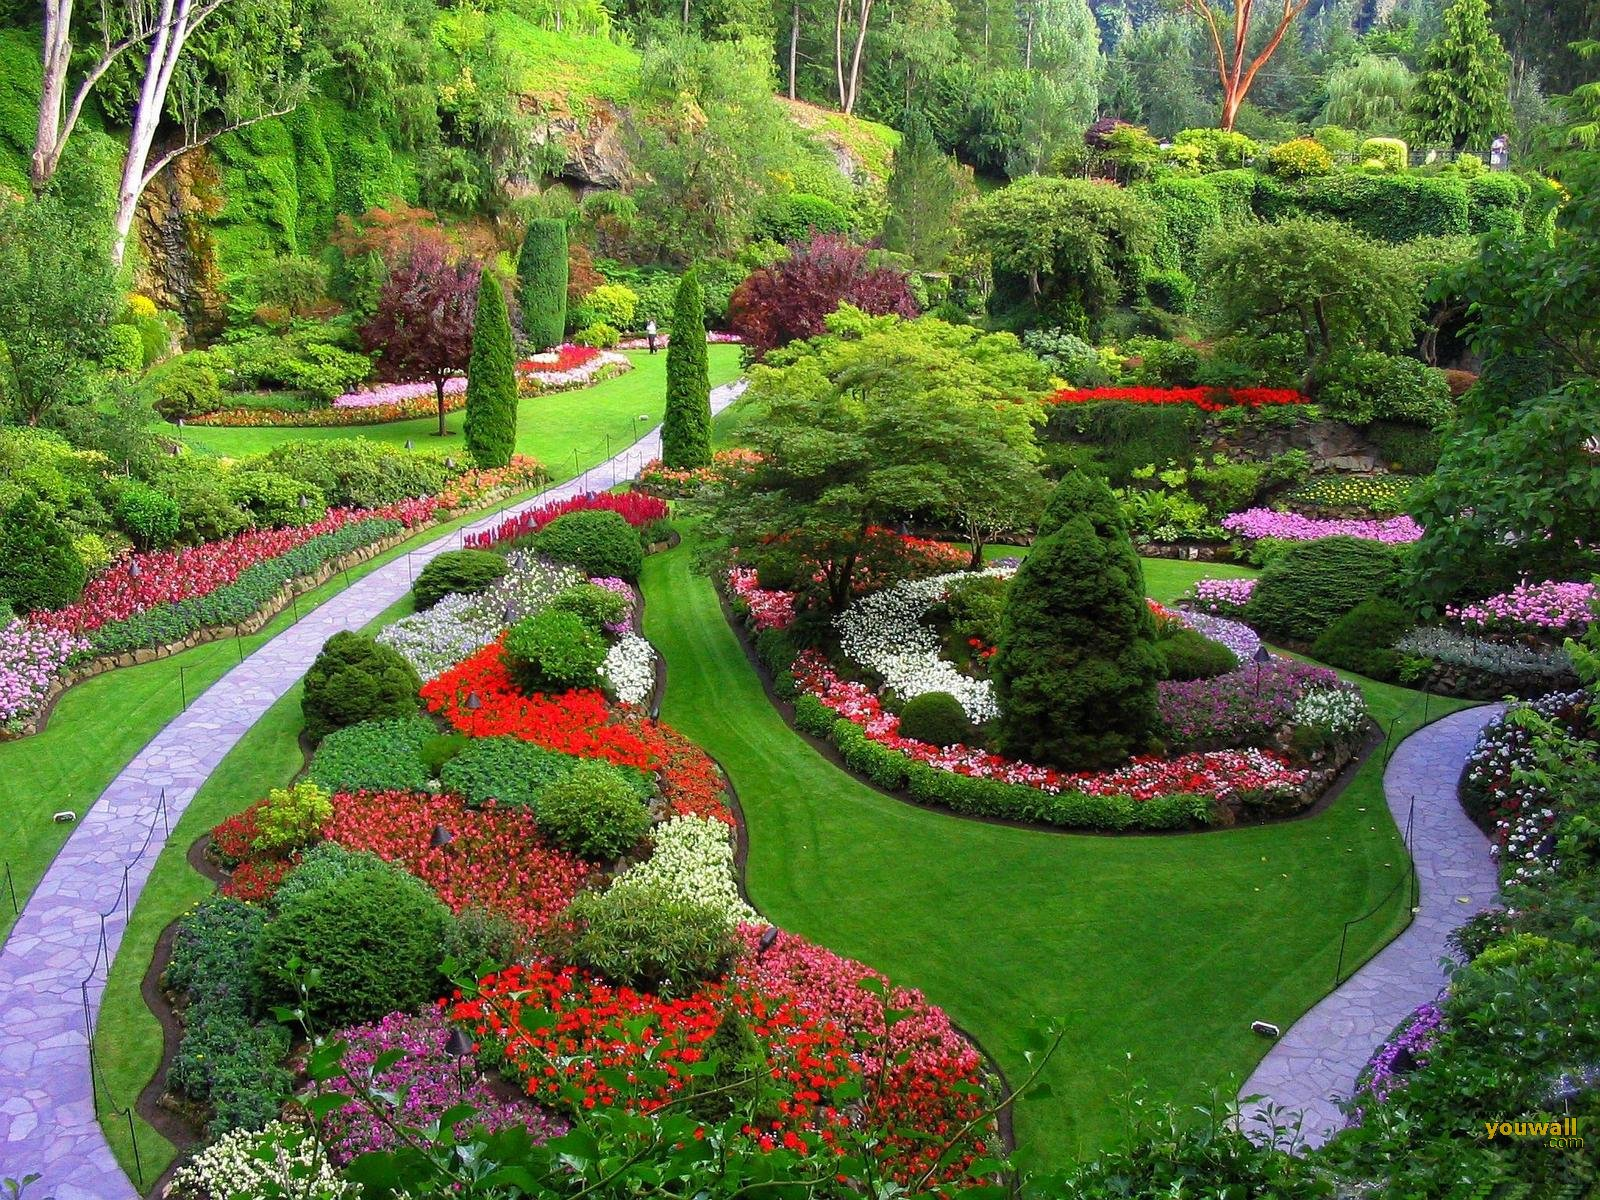

In [30]:
imagefile = os.path.join(IMAGES_DIR, "image (1).jpg")

viewimage(filename=imagefile, width=512)

Prompt: a garden with many different flowers with Butchart Gardens in the background,tree,botanical garden,outdoor,landscaping,garden,shrub,grass,groundcover,plant,hedge,annual plant,park,yard,spring,flower 

Filename: artificial_images/a_garden_with_many_different_flowers_with_Butchart_809230.jpg


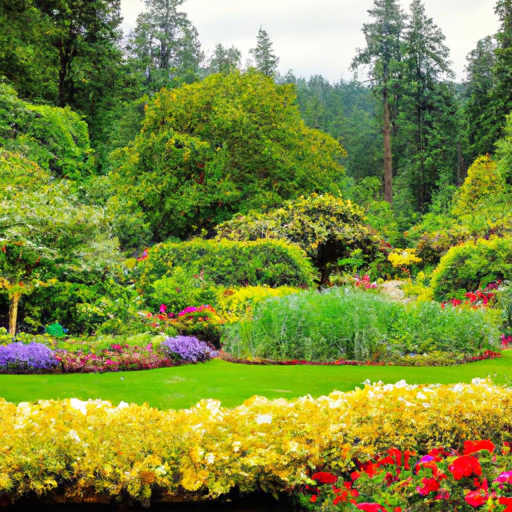

In [31]:
get_dalle2_image()

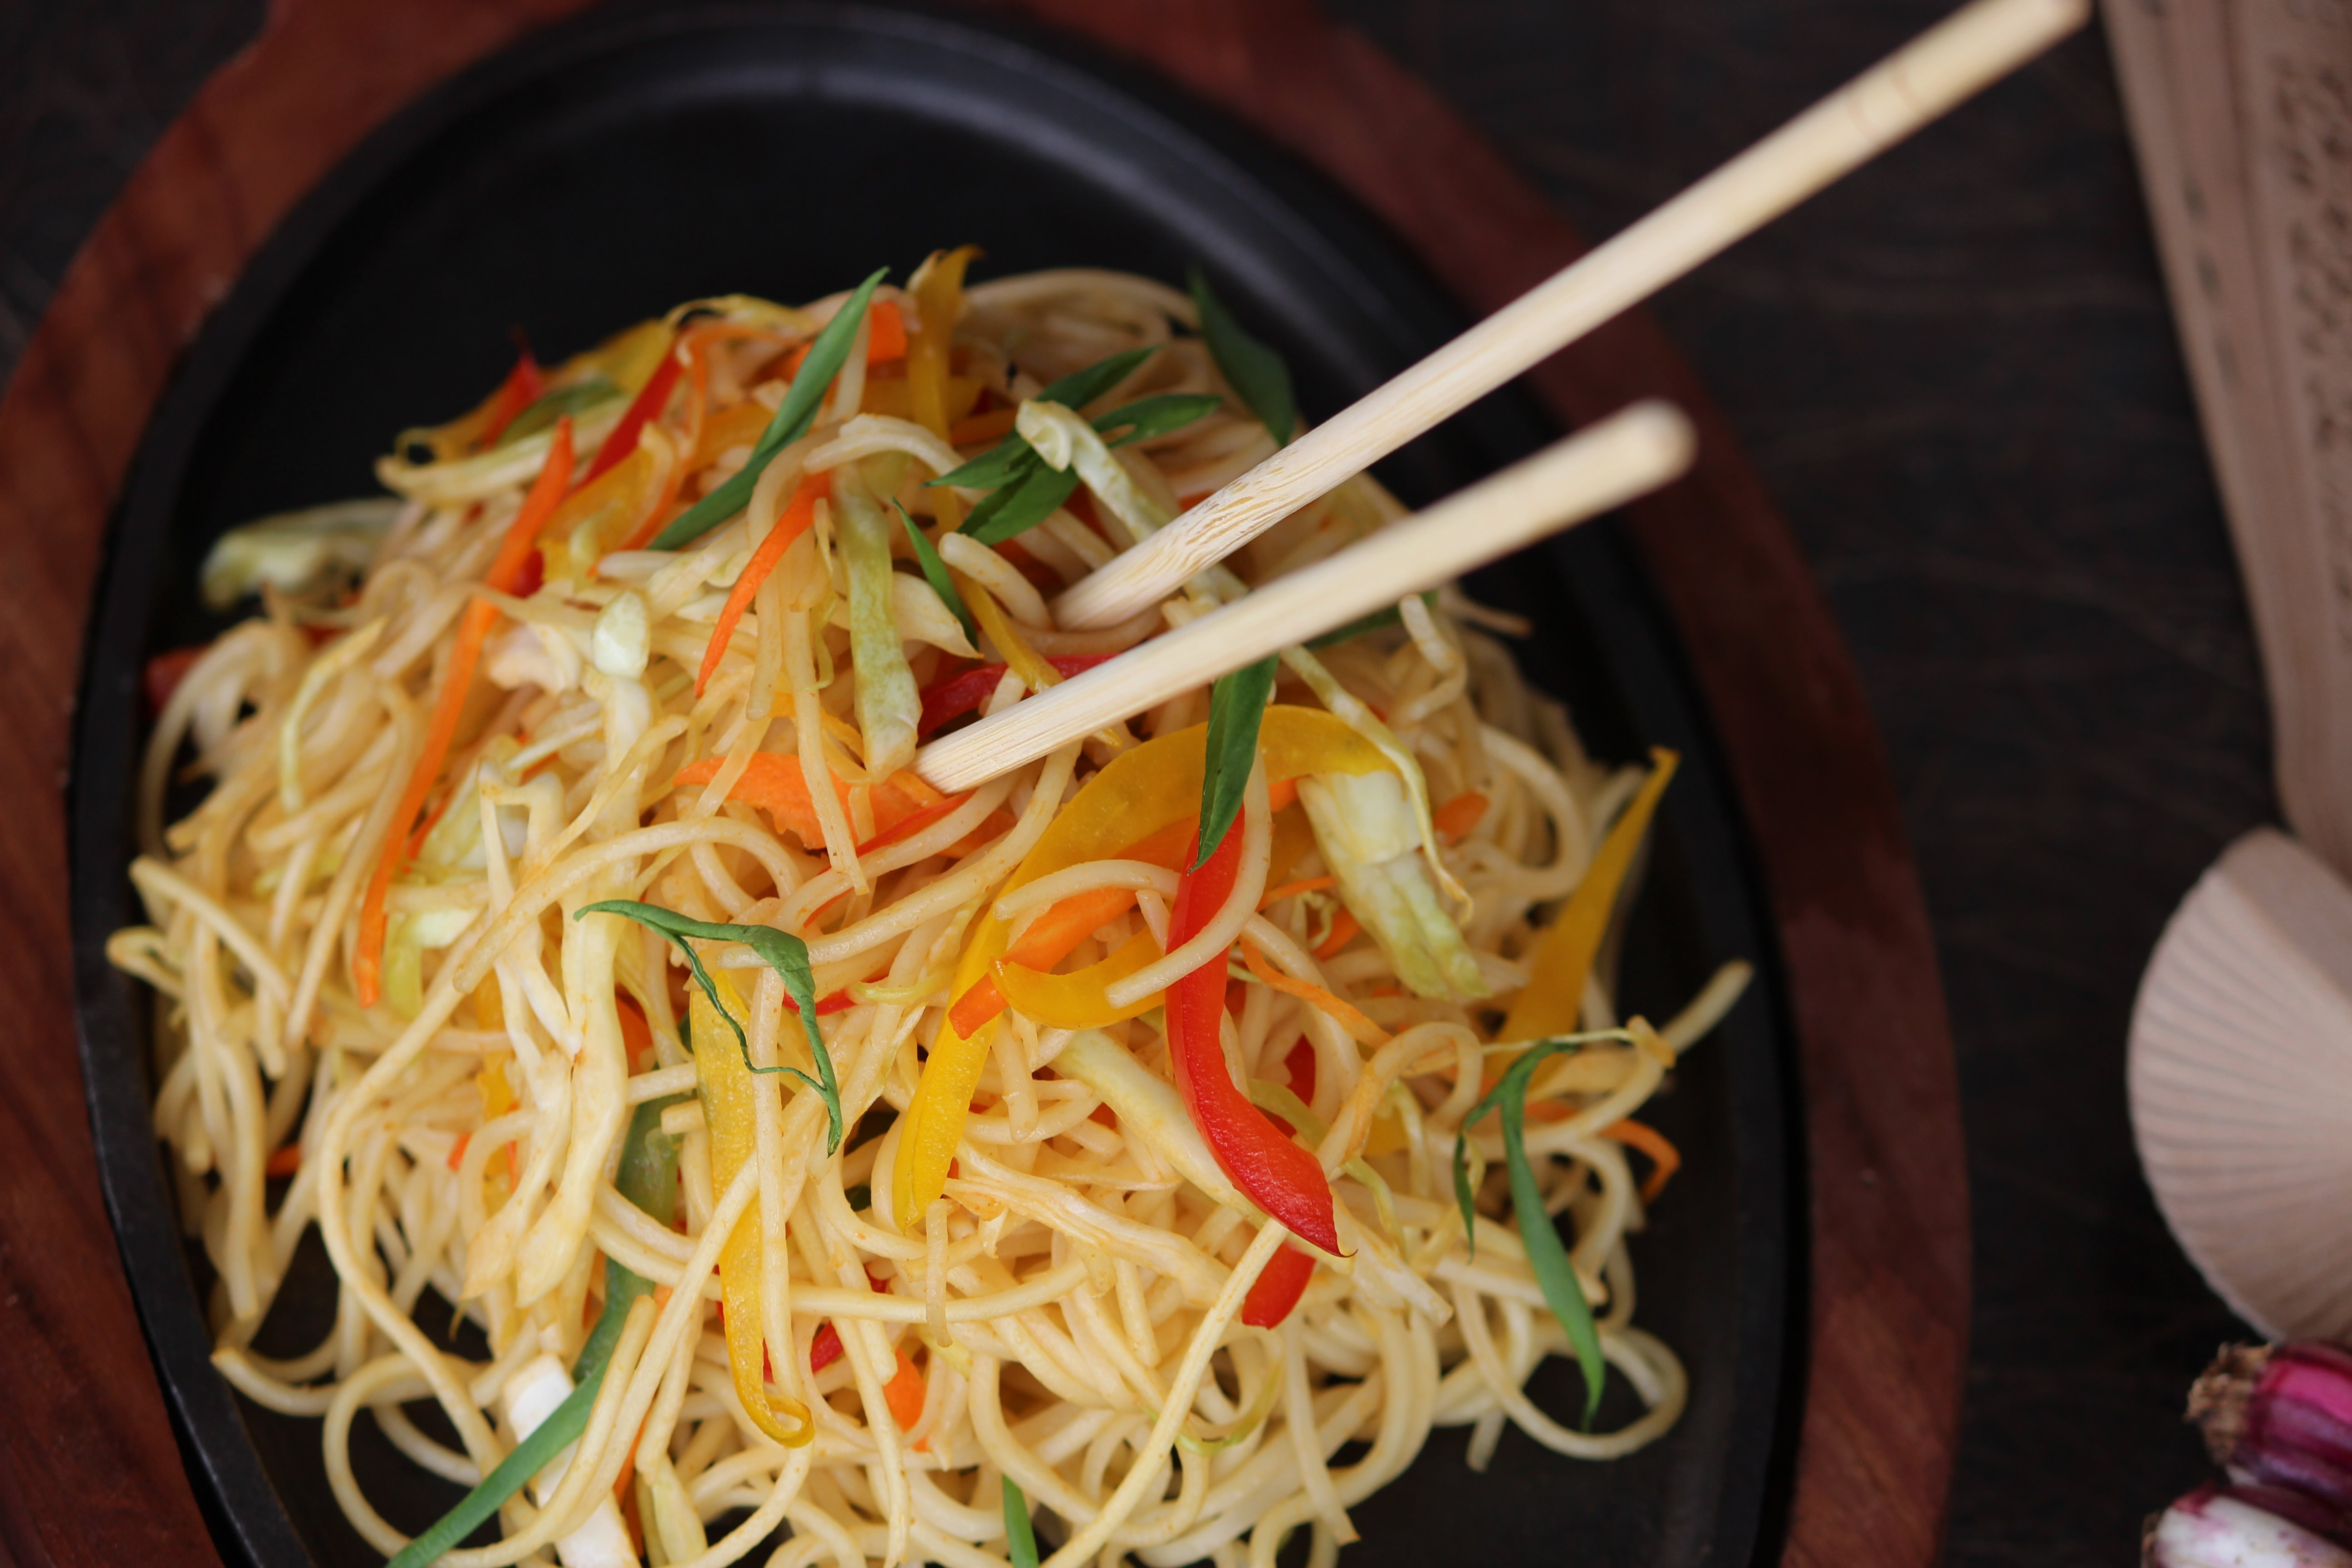

In [34]:
imagefile = os.path.join(IMAGES_DIR, "image (2).jpg")

viewimage(filename=imagefile, width=512)

Prompt: a plate of noodles with chopsticks,noodle,cuisine,food,chinese food,chinese noodles,pasta,indoor,al dente,spaghetti,yi mein,rice noodles,fried noodles,vermicelli,thai food,chopsticks,pancit,instant noodles,shirataki noodles,capellini,hot dry noodles,chop suey,yakisoba,bucatini,pici,vegetable,drunken noodles,mie goreng,yaki udon,bowl 

Filename: artificial_images/a_plate_of_noodles_with_chopsticks_noodle_cuisine__26337.jpg


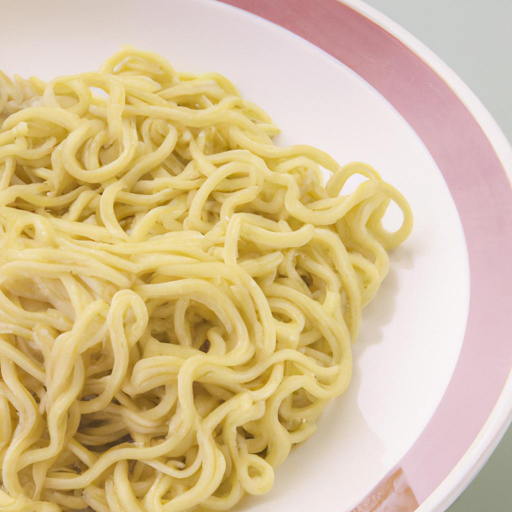

In [35]:
get_dalle2_image()

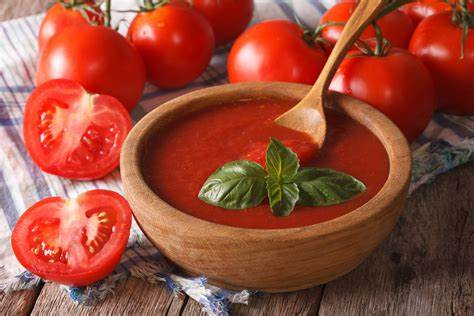

In [11]:
imagefile = os.path.join(IMAGES_DIR, "image (3).jpg")

viewimage(filename=imagefile, width=512)

Prompt: a bowl of tomato soup with a spoon,ingredient,natural foods,produce,plum tomato,food,bowl,cherry tomatoes,bush tomato,vegetarian food,vegan nutrition,sauces,whole food,plant,solanum,tomato,sitting,indoor,wooden,red,vegetable,soup 

Filename: artificial_images/a_bowl_of_tomato_soup_with_a_spoon_ingredient_natu_207941.jpg


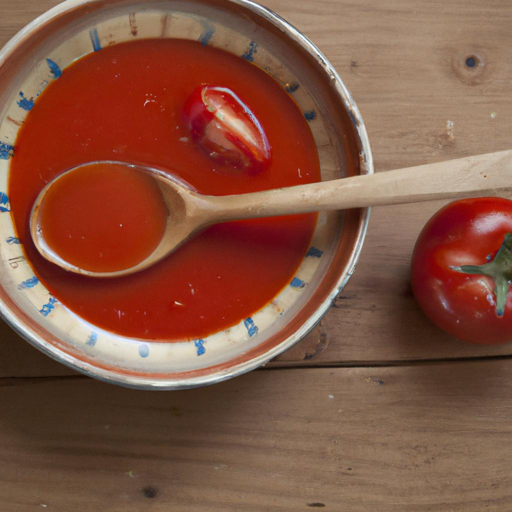

In [12]:
get_dalle2_image()

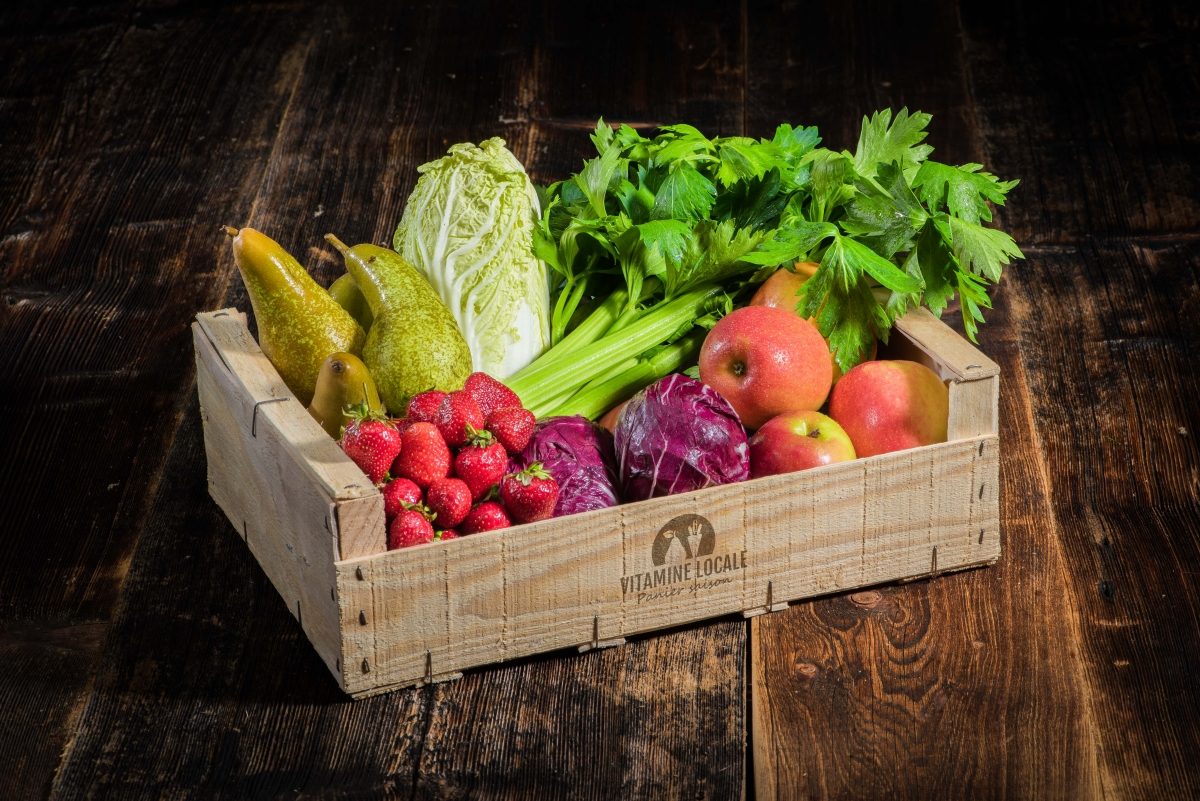

In [13]:
imagefile = os.path.join(IMAGES_DIR, "image (4).jpg")

viewimage(filename=imagefile, width=512)

Prompt: a wooden box of vegetables,natural foods,whole food,vegan nutrition,local food,diet food,superfood,food group,vegetarian food,leaf vegetable,greengrocer,staple food,cruciferous vegetables,ingredient,still life,food,root vegetable,apple,vegetable,fruit,wooden,indoor,fresh,floor,wood,produce,plant,lettuce 

Filename: artificial_images/a_wooden_box_of_vegetables_natural_foods_whole_foo_186389.jpg


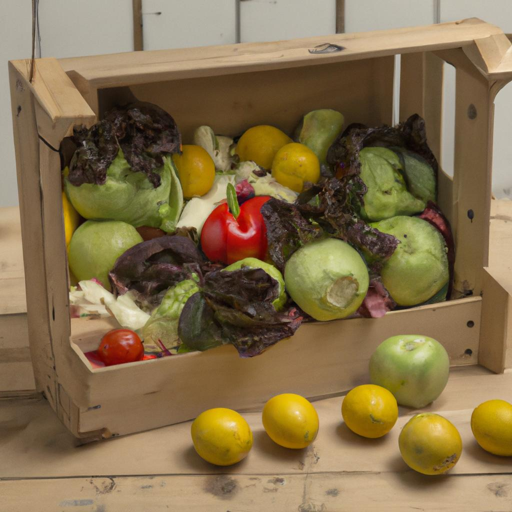

In [14]:
get_dalle2_image()

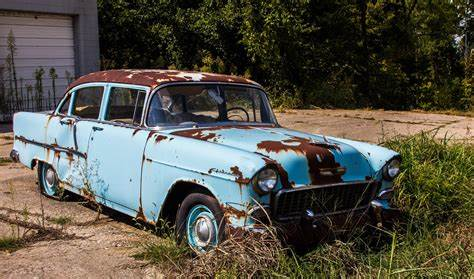

In [15]:
imagefile = os.path.join(IMAGES_DIR, "image (5).jpg")

viewimage(filename=imagefile, width=512)

Prompt: a blue car with rust on the side,vehicle,outdoor,land vehicle,wheel,transport,car,tree,grass,hardtop,rust,classic car,parked,auto part,rusty,abandoned,ground,blue,truck 

Filename: artificial_images/a_blue_car_with_rust_on_the_side_vehicle_outdoor_l_111521.jpg


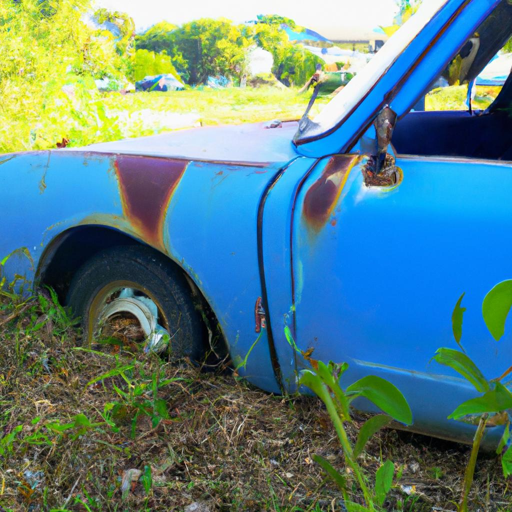

In [16]:
get_dalle2_image()

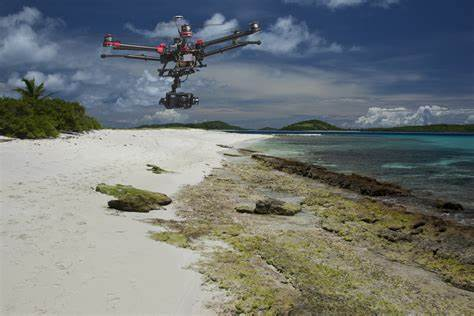

In [17]:
imagefile = os.path.join(IMAGES_DIR, "image (6).jpg")

viewimage(filename=imagefile, width=512)

Prompt: a drone flying over a beach,outdoor,cloud,sky,beach,water,ground,landscape 

Filename: artificial_images/a_drone_flying_over_a_beach_outdoor_cloud_sky_beac_693727.jpg


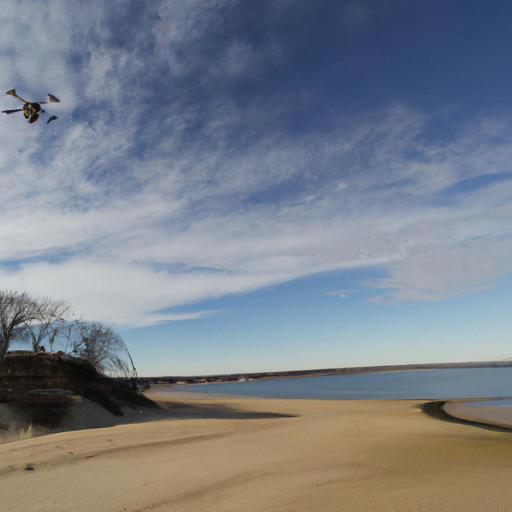

In [18]:
get_dalle2_image()

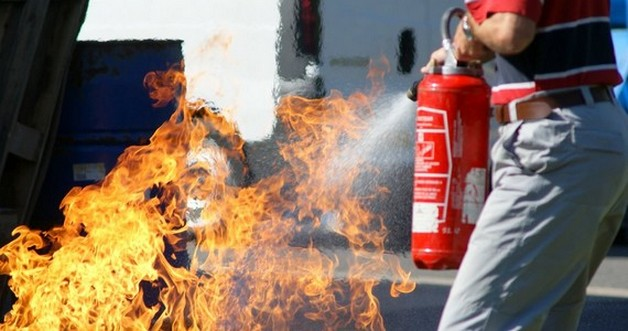

In [19]:
imagefile = os.path.join(IMAGES_DIR, "image (7).jpg")

viewimage(filename=imagefile, width=512)

Prompt: a fire extinguisher spraying water,outdoor,fire,firefighter,fire extinguisher,clothing,person,smoke,flame,pollution,man,red 

Filename: artificial_images/a_fire_extinguisher_spraying_water_outdoor_fire_fi_472529.jpg


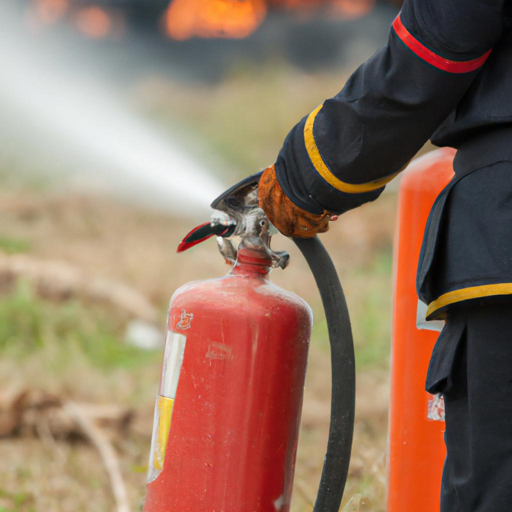

In [20]:
get_dalle2_image()

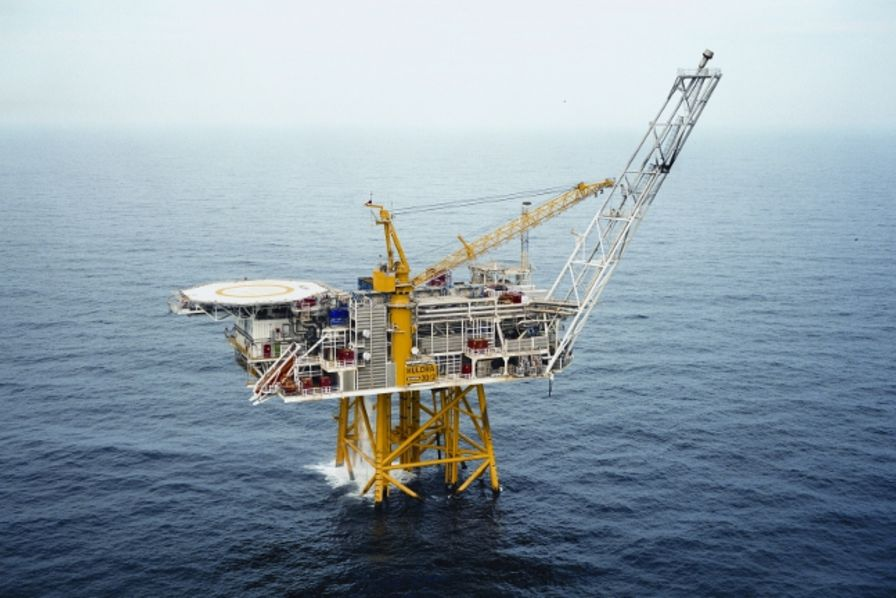

In [36]:
imagefile = os.path.join(IMAGES_DIR, "image (8).jpg")

viewimage(filename=imagefile, width=512)

Prompt: a large crane on a platform in the ocean,water,sky,outdoor,hoisting,sea,gear,ship,crane 

Filename: artificial_images/a_large_crane_on_a_platform_in_the_ocean_water_sky_520913.jpg


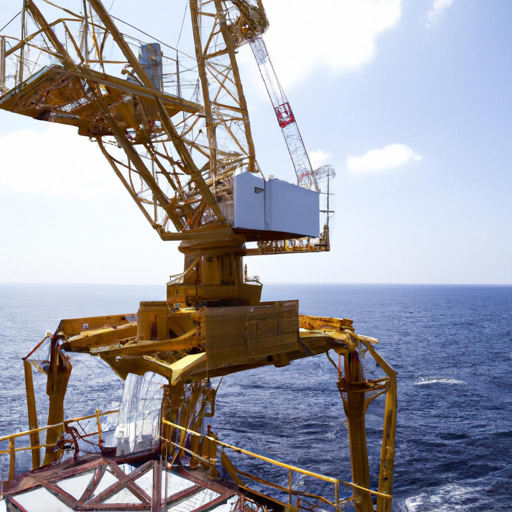

In [37]:
get_dalle2_image()

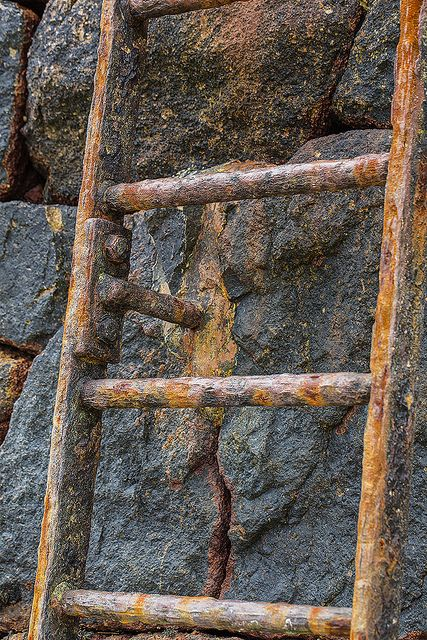

In [38]:
imagefile = os.path.join(IMAGES_DIR, "image (9).jpg")

viewimage(filename=imagefile, width=512)

Prompt: a rusty ladder leaning against a rock wall,building,rust,stone,outdoor,rock,abstract 

Filename: artificial_images/a_rusty_ladder_leaning_against_a_rock_wall_buildin_694801.jpg


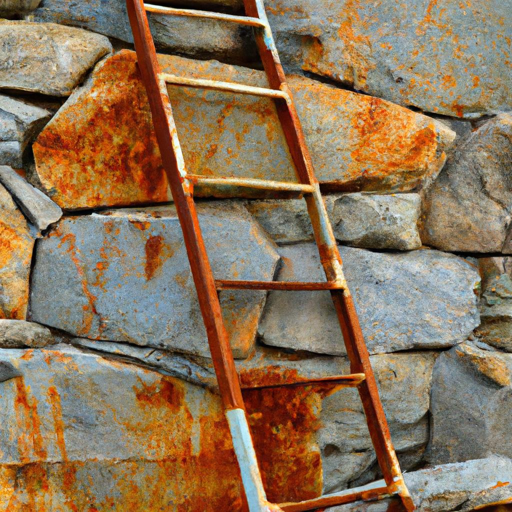

In [39]:
get_dalle2_image()